# RSA Searchlight Significance Testing

In [5]:
import os
import glob
import pandas as pd

from nltools.stats import zscore, regress, find_spikes
from nltools.data import Brain_Data, Design_Matrix
from nilearn.plotting import view_img, glass_brain, plot_stat_map

### Set paths and set subjects

In [11]:
bids_dir = '/data/projects/relationship_knowledge/'


os.chdir(bids_dir)

output_dir = os.path.join(bids_dir, 'derivatives', 'rsa_pymvpa')
data_dir = os.path.join(bids_dir, 'derivatives','rsa_pymvpa')

# Define subject list
subjs_scan_info = pd.read_csv(bids_dir+'derivatives/rsa_neurora/mriqc_summary_poor.csv')
subjs_list = list(subjs_scan_info['subject'].unique())
subjs_list.sort()


print('Found '+str(len(subjs_list))+' subjects')


file_list = glob.glob(os.path.join(data_dir, 'multireg_comp_maps', 'sub-*_sl_comp1.nii.gz'))
file_list.sort()
print('Found '+str(len(file_list))+' subject maps')


# Define masks
mni_mask_fname = 'derivatives/reliability_analysis/relscenarios/Anatomy/MNI152_T1_2p5mm_brain_gm_mask.nii.gz'

Found 36 subjects
Found 36 subject maps


# Single Subject

## Load Data

In [12]:
subj = subjs_list[0]

sl_comp1 = Brain_Data(file_list, mask=mni_mask_fname)

## Perform multiple comparisons correction

In [13]:
comp1_stats = sl_comp1.ttest(threshold_dict={'fdr':.05})

print(comp1_stats.keys())

/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1892: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)
/opt/anaconda3/lib/python3.7/site-packages/nltools/stats.py:119: RuntimeWarning: invalid value encountered in less_equal
  below = np.where(s <= null)[0]
/opt/anaconda3/lib/python3.7/site-packages/nltools/stats.py:173: RuntimeWarning: invalid value encountered in less
  mask.data = (mask.data < thr).astype(int)


dict_keys(['t', 'p', 'thr_t'])


# Group Analysis
Perform a one sample t-test and multiple comparisons correction

In [29]:
# Define mask
subj_mni_mask = bids_dir+"derivatives/reliability_analysis/relscenarios/Anatomy/"+subj+"_space-MNI152NLin2009cAsym_label-GM_probseg_bin.nii.gz"

# Define dictionary to store stats
comp_stats_all = {}

for n in range(1,5):
    # Find subject tmaps for a given component
    file_list = glob.glob(os.path.join(data_dir, 'multireg_comp_maps', 'sub-*_sl_comp'+str(n)+'.nii.gz'))
    file_list.sort()
    
    # Load data
    temp_sl_comp = Brain_Data(file_list, mask=subj_mni_mask)
    
    # Perform FDR multiple comparisons correction
    comp_stats_all['comp'+str(n)] = temp_sl_comp.ttest(threshold_dict={'fdr':.05})
    
    # Export as nifti
    comp_stats_all['comp'+str(n)]['t'].write(os.path.join(data_dir,'multireg_comp_maps','tmap_sl_comp'+str(n)+'_unc.nii.gz'))
    comp_stats_all['comp'+str(n)]['thr_t'].write(os.path.join(data_dir,'multireg_comp_maps','tmap_sl_comp'+str(n)+'_fdr05.nii.gz'))

## Visualization

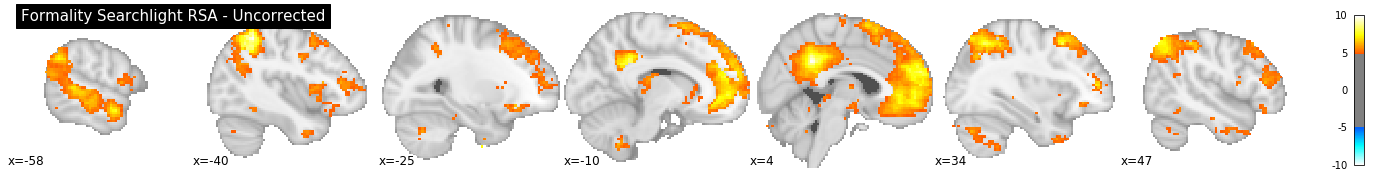

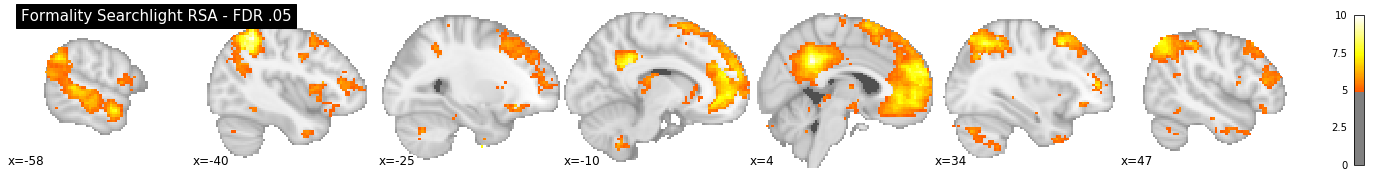

In [40]:
plot_stat_map(comp_stats_all['comp1']['t'].to_nifti(), threshold=5,
    display_mode='x', vmax=10, colorbar=True,
    title='Formality Searchlight RSA - Uncorrected')

plot_stat_map(comp_stats_all['comp1']['thr_t'].to_nifti(), threshold=5,
    display_mode='x', vmax=10, colorbar=True,
    title='Formality Searchlight RSA - FDR .05')

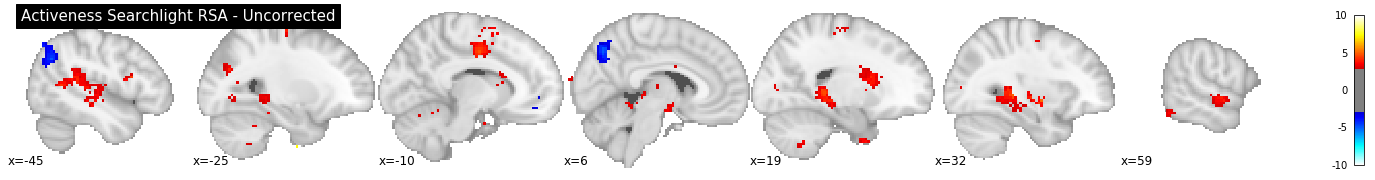

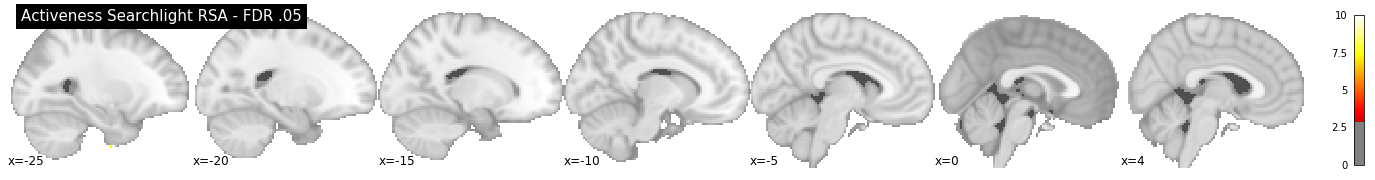

In [48]:
plot_stat_map(comp_stats_all['comp2']['t'].to_nifti(), threshold=3,
    display_mode='x', vmax=10, colorbar=True,
    title='Activeness Searchlight RSA - Uncorrected')

plot_stat_map(comp_stats_all['comp2']['thr_t'].to_nifti(), threshold=3,
    display_mode='x', vmax=10, colorbar=True,
    title='Activeness Searchlight RSA - FDR .05')

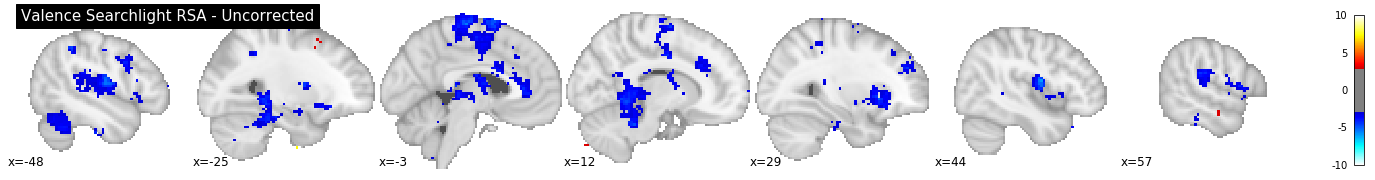

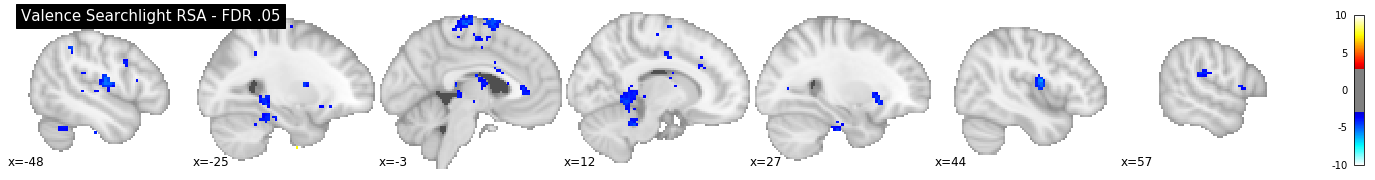

In [46]:
plot_stat_map(comp_stats_all['comp3']['t'].to_nifti(), threshold=3,
    display_mode='x', vmax=10, colorbar=True,
    title='Valence Searchlight RSA - Uncorrected')

plot_stat_map(comp_stats_all['comp3']['thr_t'].to_nifti(), threshold=3,
    display_mode='x', vmax=10, colorbar=True,
    title='Valence Searchlight RSA - FDR .05')

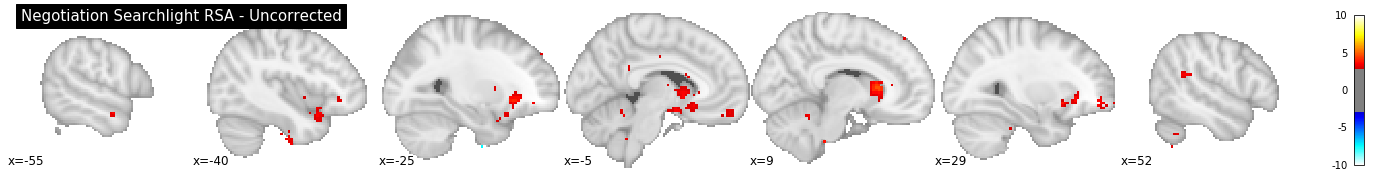

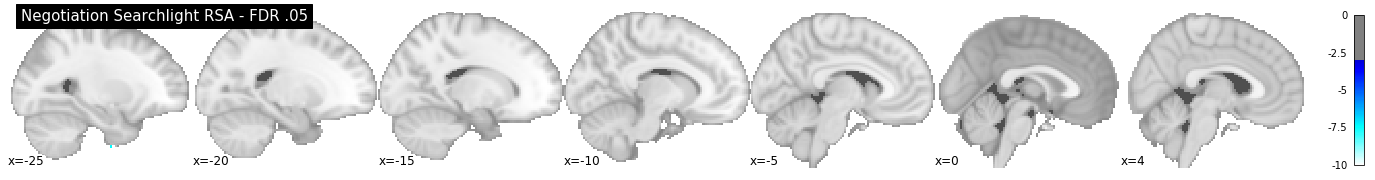

In [47]:
plot_stat_map(comp_stats_all['comp4']['t'].to_nifti(), threshold=3,
    display_mode='x', vmax=10, colorbar=True,
    title='Negotiation Searchlight RSA - Uncorrected')

plot_stat_map(comp_stats_all['comp4']['thr_t'].to_nifti(), threshold=3,
    display_mode='x', vmax=10, colorbar=True,
    title='Negotiation Searchlight RSA - FDR .05')